# Trabajo Practico 5
## Nicolas Pereyra

Se puede obserbar en la imagan del bode que el filtro analizado es un filtro Notch-Pasa Bajos acoplado con un filtro Pasa altos con la misma crecuencia de paso que el filtro Notch. Sabiendo esto podemos intuir que la traferencia del circuito tendra la siguiente forma.  
$T_{lp}=\frac{w_o}{s+w_o}a*\frac{s²+k²w_o²}{s²+s\frac{w_o}{q}+w_o²}$  
Y para el filtro pasa altos pedido sera la siguiente:  
$T_{hp}=\frac{s}{s+w_o}a.k²\frac{s²+\frac{w_o²}{k²}}{s²+s\frac{w_o}{q}+w_o²}$  
  
La variable $k$ determina la distancia respecto de la frecuencia de corte en la que se encuentre el $0$. En este caso el cero se encuentra a una distancia de $3$ veces la frecuencia de corte, por lo tanto $k = 3$.  
Por otro lado la variable $a$ es una variable que que se obtubo experimentalmente en para que que la transferencia tenga una ganancia maxima de $0db$. El valor de $a$ obtenido fue de $a = 0.1$  
  
Con todo esto listo solo falta conocer el denominar el cual es un es el mismo que un butter de 3° orden, $(s+1)(s²+s+1)$

#### Transferencia de filtro Notch-Pasa Bajos(Normalizdo):

(1,
 array([<Axes: title={'center': 'Magnitude response'}, ylabel='Magnitude [dB]'>,
        <Axes: title={'center': 'Phase response'}, xlabel='Angular frequency [rad/sec]', ylabel='Phase [rad]'>],
       dtype=object))

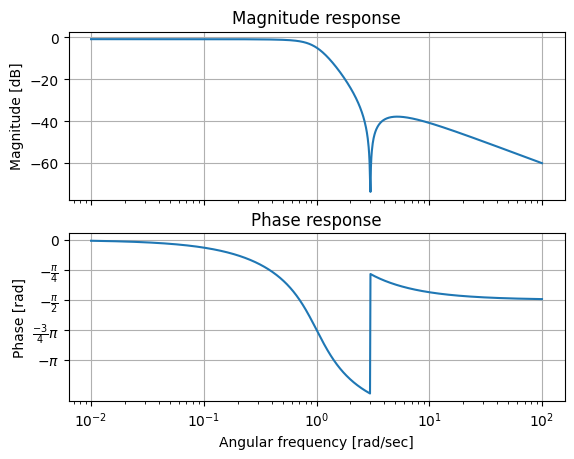

In [44]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
from pytc2.sistemas_lineales import analyze_sys, pretty_print_bicuad_omegayq, tf2sos_analog, pretty_print_SOS, bodePlot
from pytc2.general import print_subtitle

#Titulo
print_subtitle('Transferencia de filtro Notch-Pasa Bajos(Normalizdo):')

#Variables
a = 0.1
k = 3
wo = 100*2*np.pi

##Denominador y Numerador
b_lp = [a , 0, a*k**2]
a_lp = [1, 2, 2, 1]

#Tf
lp = signal.TransferFunction(b_lp,a_lp)

#Plot
bodePlot(lp)

#### Transferencia de filtro Notch-Pasa Altos(Normalizdo):

<IPython.core.display.Math object>

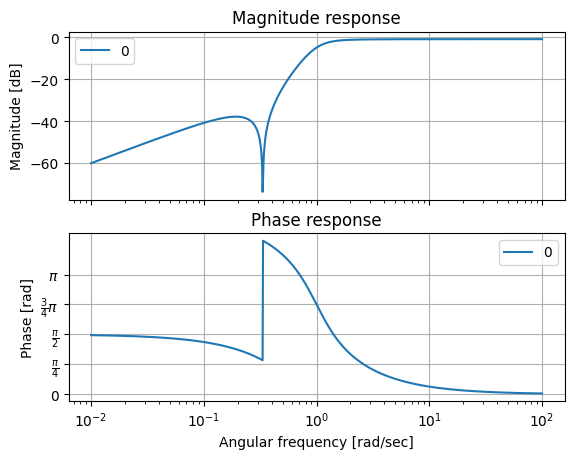

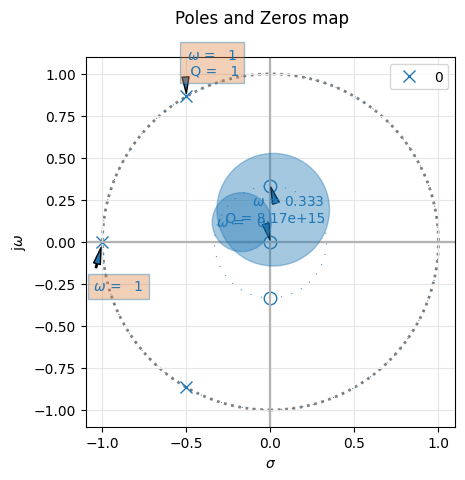

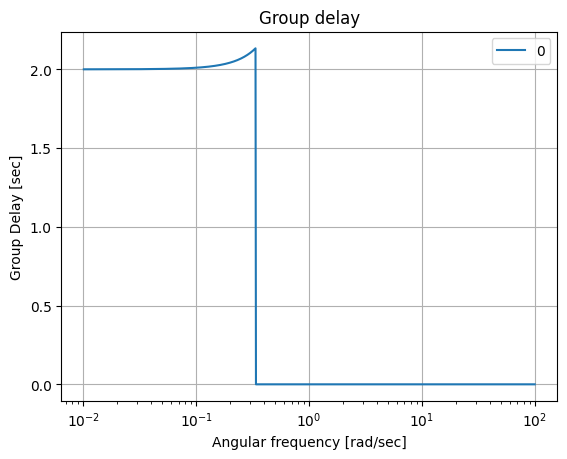

In [61]:
## Denominador y Numerador
b_hp = [a*k**2, 0, a, 0]
a_hp = [1, 2, 2, 1]

##Tf
hp = signal.TransferFunction(b_hp,a_hp)

## Ecuacion
print_subtitle('Transferencia de filtro Notch-Pasa Altos(Normalizdo):')

hp_ = tf2sos_analog(b_hp,a_hp)
pretty_print_SOS(hp_)

##Print
analyze_sys(hp)

#### Transferencia de filtro Notch-Pasa Altos(Desnormalizdo):

[0.9, 0, 39478.41760435744, 0]
[1, 1256.6370614359173, 789568.3520871487, 248050213.44239858]


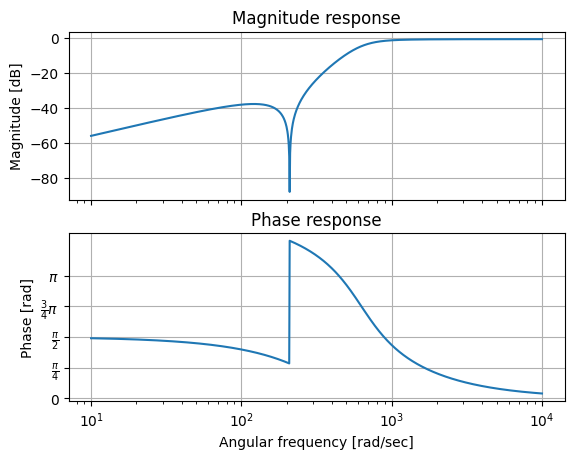

In [58]:
## Denominador y Numerador
b_hpdes = [a*k**2, 0, a*wo**2, 0]
a_hpdes = [1, 2*wo, 2*wo**2, wo**3]

##Tf
hpdes = signal.TransferFunction(b_hpdes,a_hpdes)

## Ecuacion
print_subtitle('Transferencia de filtro Notch-Pasa Altos(Desnormalizdo):')
    
##Print
bodePlot(hpdes)

$T_{hp}=\frac{0.9.s}{s²+300.2.\pi}\frac{s²+\frac{(300.2.\pi)²}{3²}}{s²+s.300.2.\pi+(300.2.\pi)²}$  
$T_{hp}=\frac{0.9.s}{s+1885}\frac{s²+394.78.10³}{s²+s.1885+3.553.10⁶}$  

## Eleccion de componentes:
### Circuito utilizado:
Para poder obtener un circuito que represente la transferencia obtenida debemos colocar a la salida del circuito dado un levantamiento parcial del masas compuesto por un capacitor en serie con una resistencia y una resistencia en derivacion.
### Transferencia del ciruito dado:
$H(s)=\frac{s²+\frac{1}{C².R_5.(R_1-R_2)}}{s²+s.\frac{1}{C.R_1}+\frac{1}{C².R_5.R_2}}$  

Conoderamos que $C = 0.1\mu F$:  
$\frac{1}{C.R_1} = 1885$  
$\frac{1}{C².R_5.R_2} = 3.553.10⁶$  
$\frac{1}{C².R_5.(R_2-R_1)} = 394.78.10³$  

Componentes:  
$R_1 = 5.3 k\Omega$  
$R_2 = 4.7 k\Omega$  
$R_5 = 5.97 k\Omega$  

### Transferencia levantamiento parcial de masas:
$H(s) = \frac{Z_2}{Z_1+Z_2}=\frac{R.(1-a)}{\frac{1}{s.C}+Ra+R(1-a)} = \frac{s.(1-a)}{s+\frac{1}{C.R}}$

Componentes:
$C = 0.1\mu F$  
$R = 5305 \Omega$  
$Ra = 530 \Omega$  
$R(1-a) = 4.7k \Omega$

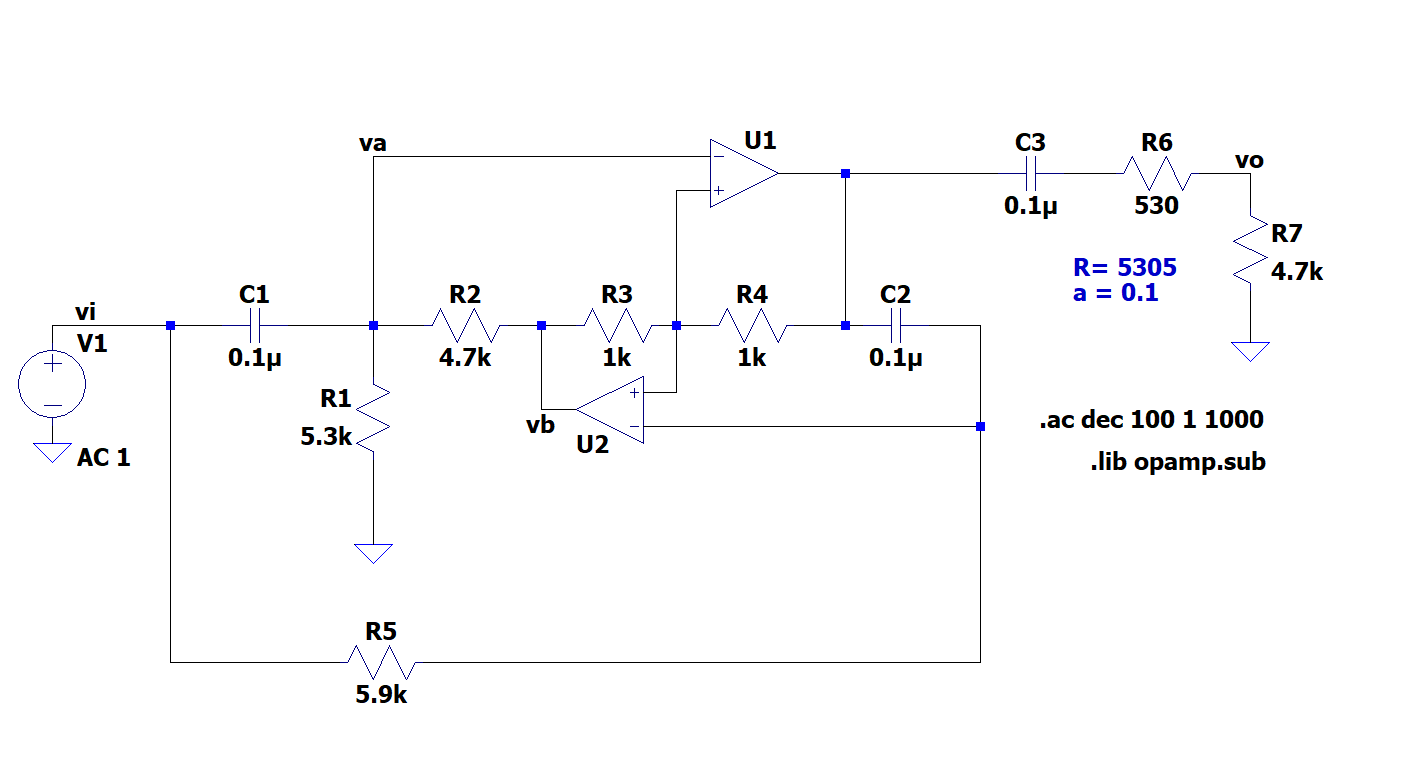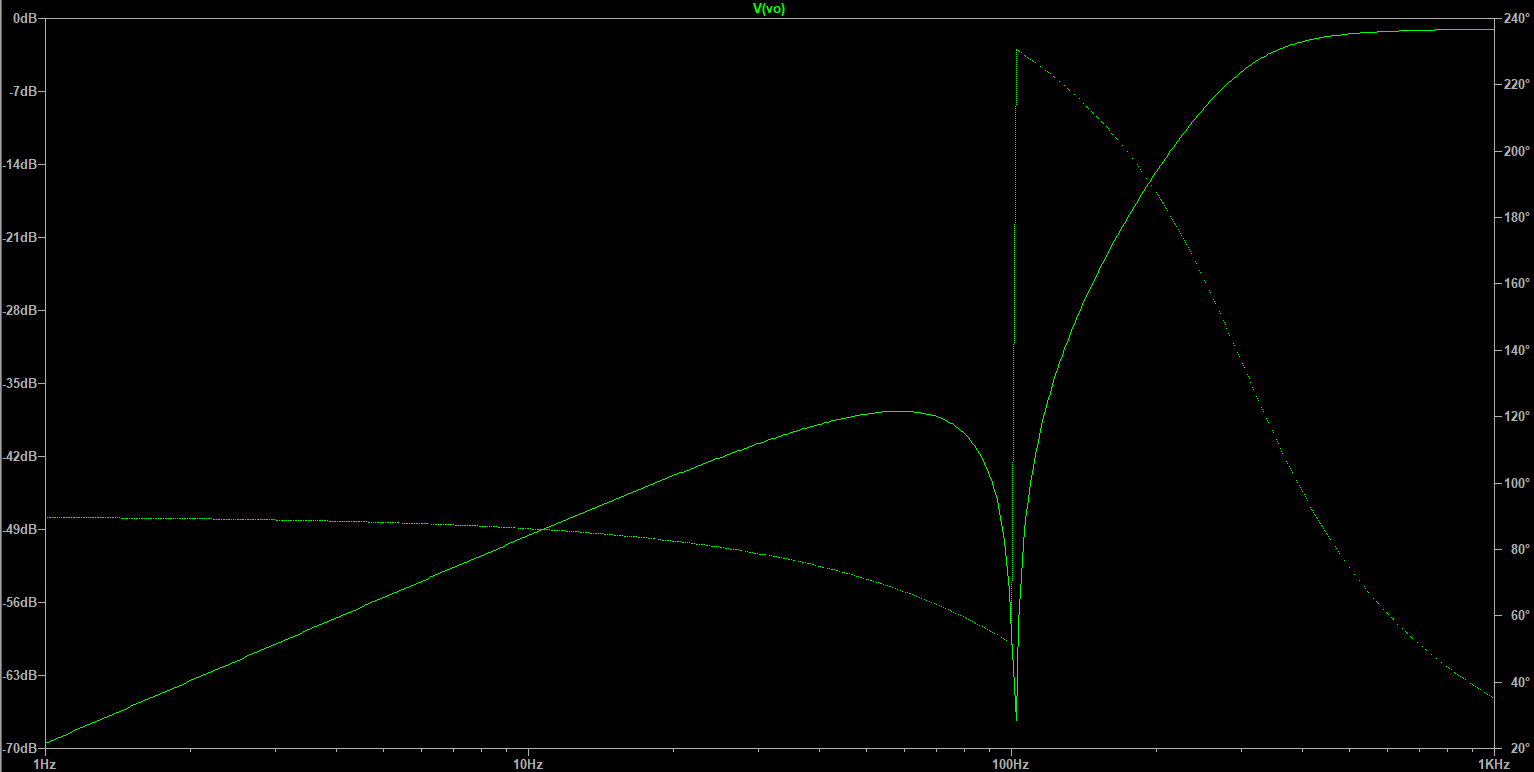

## Circuito propuesto por Schauman:
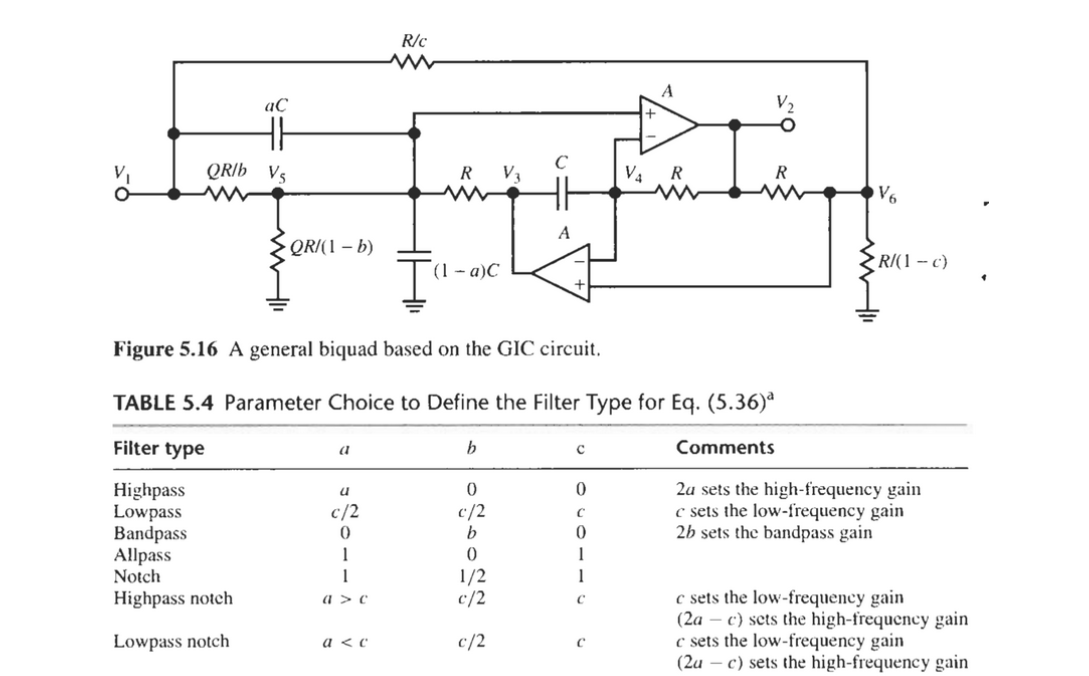
$T(s) = \frac{s².(2a-c)+s.\frac{w_o}{Q}(2b-c)+c.w_o²}{s²+s.\frac{w_o}{q}+w_o²} \Rightarrow w_o = \frac{1}{C.R}$  
$C = 0.1 \mu F$  
$R = 5305 \Omega$  
  
### Valores de las variables:  
$T_{2°orden}=\frac{s²+\frac{(300.2.\pi)²}{3²}}{s²+s.300.2.\pi+(300.2.\pi)²} \Rightarrow$ $2a-c = 1$   ;   $2b = c$ ; $c = 1/3²$  
  
$c = 1/9$ ; $b = 1/18$ ; $a = 5/9$ ; $Q = 1$

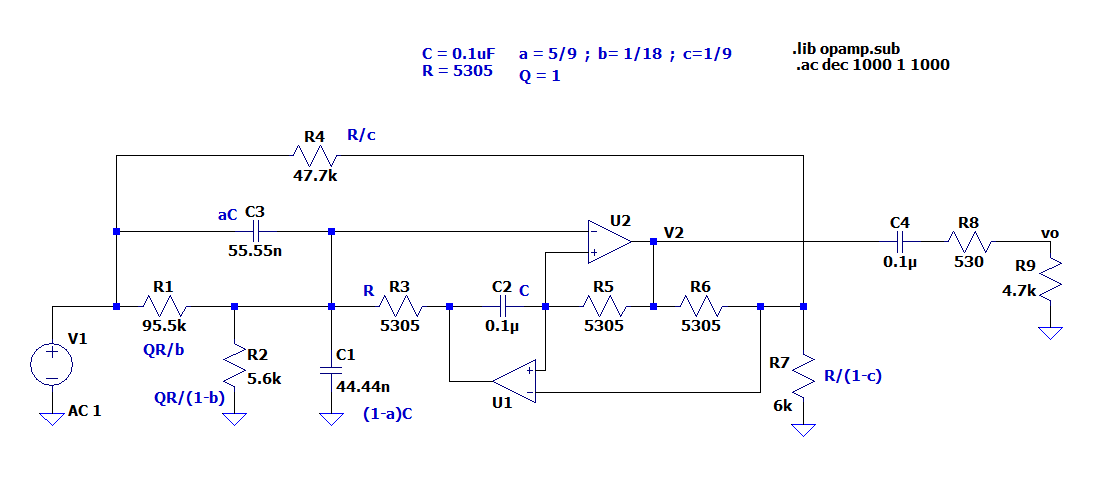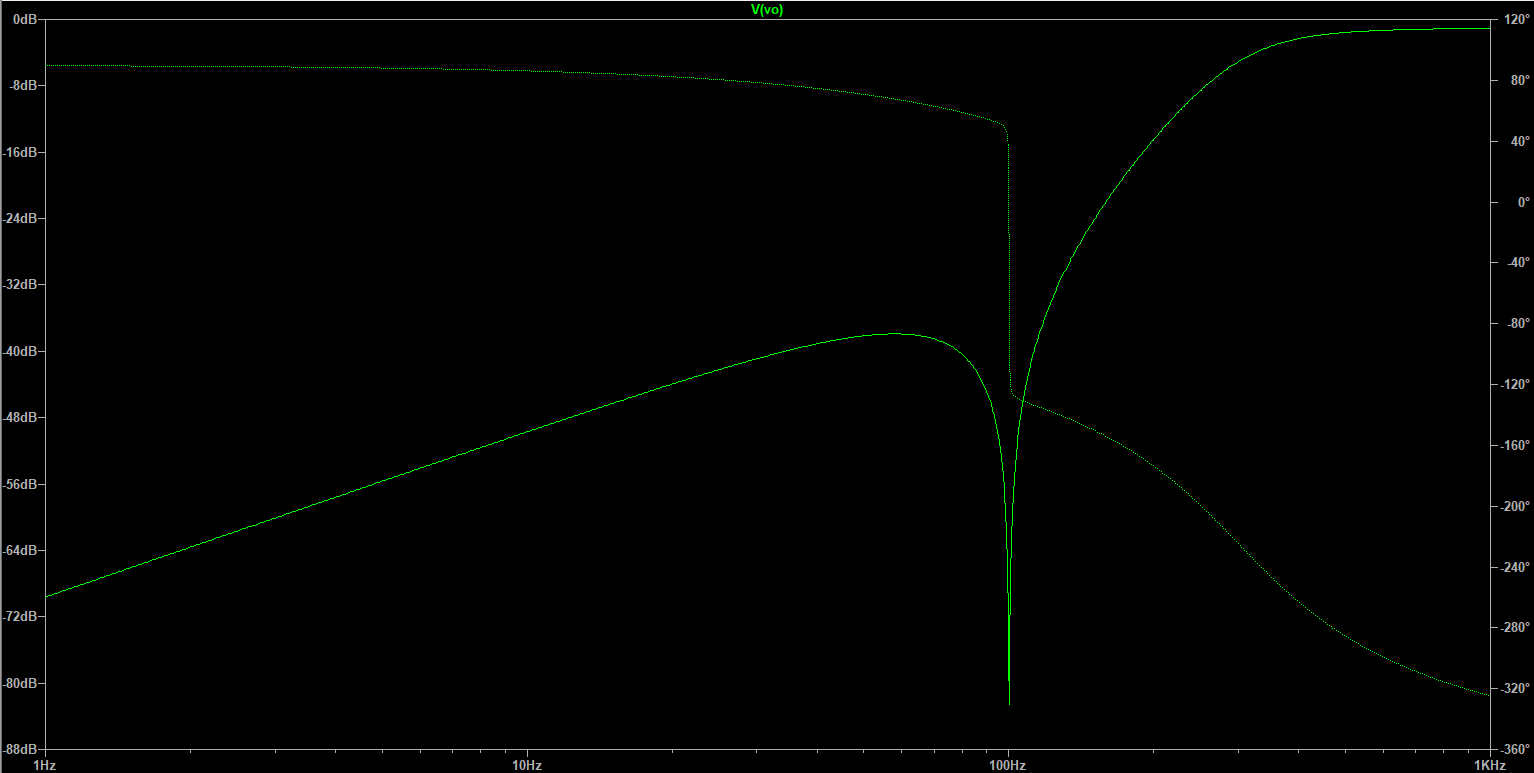